In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Read the CSV file
train_df = pd.read_csv("C:/Users/naimu/Music/Toxic Comment Classification/Toxic Comment Main Project/Input Dataset/train.csv")
train_df.drop('id', axis=1, inplace=True)  # Drop the 'id' column
train_df.head()


C:\Users\naimu\AppData\Local\Temp\ipykernel_20188\3629332115.py:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("C:/Users/naimu/Music/Toxic Comment Classification/Toxic Comment Main Project/Input Dataset/train.csv")


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0.0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0.0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0.0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0.0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0.0


In [13]:

# Display the shape of the DataFrame
print(train_df.shape)


(167572, 7)


In [14]:

# Check unique values in the 'comment_text' column
print(train_df['comment_text'].unique())



["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
 ...
 'olum sız manyakmısınz siz adam sıze sanal yıldız vermıs bilmem nerenız kalkmıs bedava kole dıye calıstırıyorlar sızı siz hala uyuyuyn olmayan bi odul aldım dıye o odul birgun gercek olursa uzerine oturursun saygılarla'
 'El mapa del reinado de Alhaken esta ligeramente exagerado en la zona del pirineo aragonés.Jaca por ejemplo fue tomada en el 780 (¡200 años antes de es

In [16]:
train_df['toxic'] = pd.to_numeric(train_df['toxic'], errors='coerce').fillna(0).astype(int)


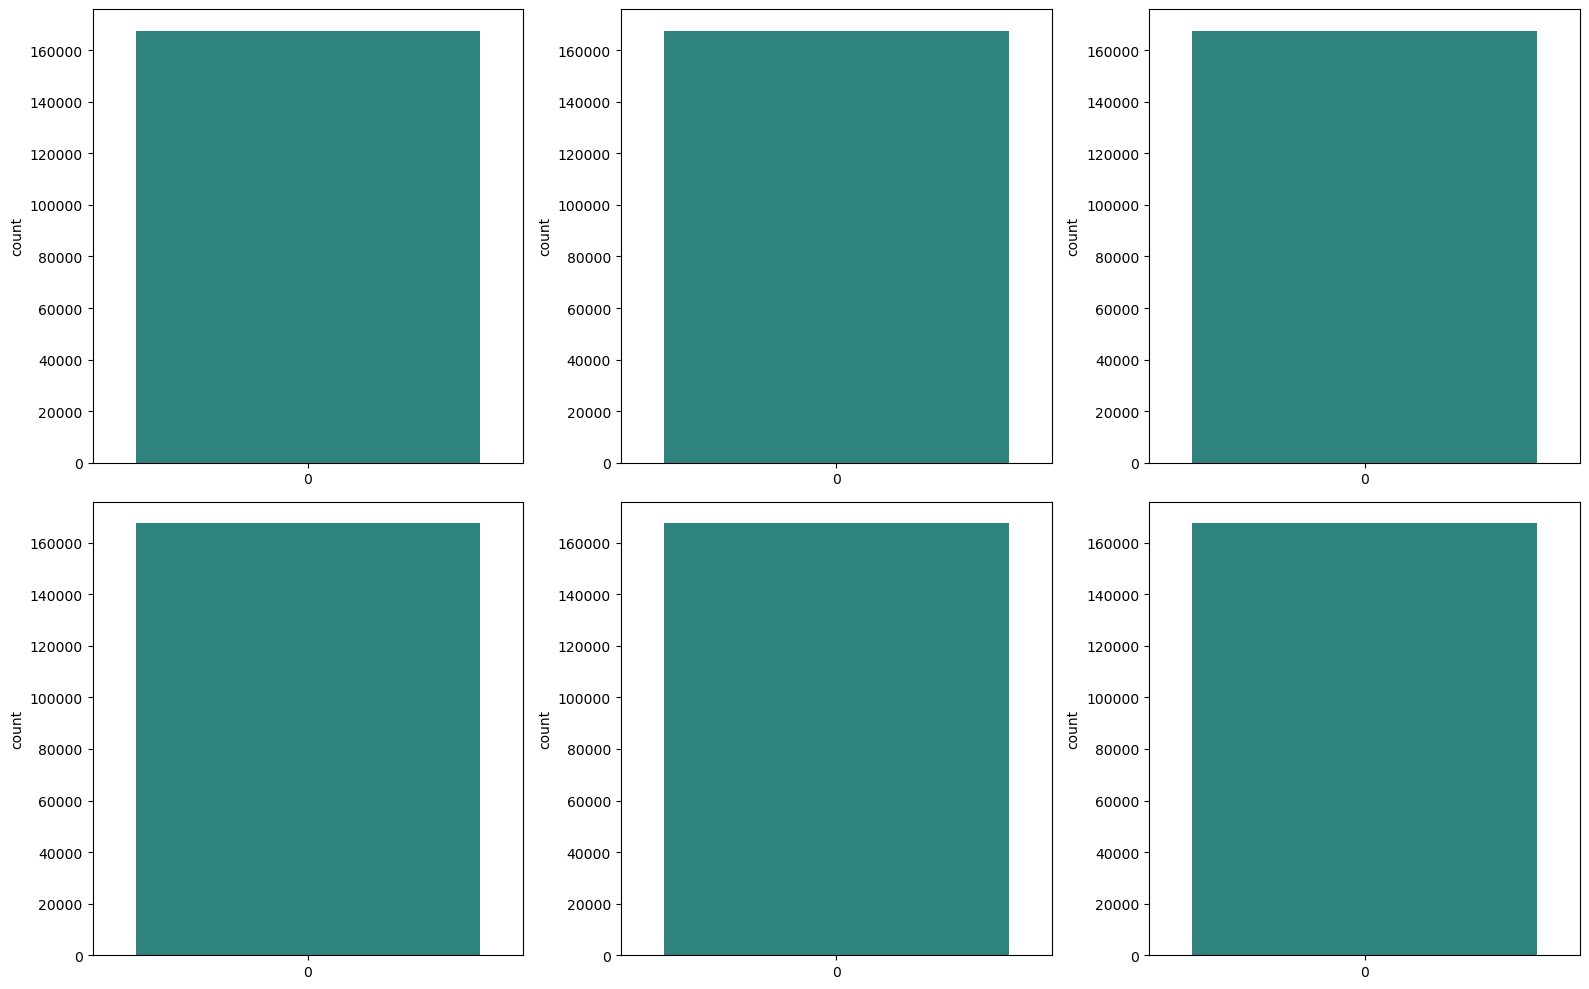

In [22]:
# Preprocess the 'insult' column
train_df['insult'] = pd.to_numeric(train_df['insult'], errors='coerce').fillna(0).astype(int)

# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(16, 10))
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

# Plot countplots
sns.countplot(train_df['toxic'], palette='viridis', ax=ax1)
sns.countplot(train_df['severe_toxic'], palette='viridis', ax=ax2)
sns.countplot(train_df['obscene'], palette='viridis', ax=ax3)
sns.countplot(train_df['threat'], palette='viridis', ax=ax4)
sns.countplot(train_df['insult'], palette='viridis', ax=ax5)
sns.countplot(train_df['identity_hate'], palette='viridis', ax=ax6)

plt.tight_layout()
plt.show()


In [23]:
test_df = pd.read_csv("C:/Users/naimu/Music/Toxic Comment Classification/Toxic Comment Main Project/Input Dataset/test.csv")
test_df.drop('id', axis = 1,inplace = True)
test_df.head()

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.


In [24]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [25]:
# clean the comment_text in train_df
cleaned_train_comment = []
for i in range(0,len(train_df)):
    cleaned_comment = clean_text(train_df['comment_text'][i])
    cleaned_train_comment.append(cleaned_comment)
train_df['comment_text'] = pd.Series(cleaned_train_comment).astype(str)

In [26]:
cleaned_train_comment[100]

'however the moonlite edit noted by golden daph was me on optus wake up wikkis so funny'

In [27]:
## Test set
cleaned_test_comment = []
for i in range(0,len(test_df)):
    cleaned_comment = clean_text(test_df['comment_text'][i])
    cleaned_test_comment.append(cleaned_comment)
test_df['comment_text'] = pd.Series(cleaned_test_comment).astype(str)

In [28]:
target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import time

#import and instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=12.0,solver = 'liblinear')
vec_tfid = TfidfVectorizer(ngram_range=(1,2),min_df=3, max_df=0.9,
                           strip_accents='unicode', use_idf=1,smooth_idf=1,
                           sublinear_tf=1, max_features = 40000)
model_tab= {}
start = time.time()
for i, label in enumerate(target):
    print('... Processing {}'.format(label))
    X = train_df.comment_text
    y = train_df[label]
    
    # Drop rows with NaN values from both X_train and y_train
    train_df.dropna(subset=[label], inplace=True)
    
    X_train, X_test, y_train, y_test = train_test_split(train_df.comment_text, train_df[label], random_state=1)

    X_train_vec = vec_tfid.fit_transform(X_train)
    X_test_vec = vec_tfid.transform(X_test)
    logreg.fit(X_train_vec, y_train)
    model_tab[label] = logreg
    y_pred_class = logreg.predict(X_test_vec)
    y_pred_prob = logreg.predict_proba(X_test_vec)[:, 1]

    # calculate AUC
    model_accuracy = metrics.roc_auc_score(y_test, y_pred_prob)
    
    print('Class '+label)
    print('Accuracy is  : {0:.3g}%'.format(model_accuracy*100))
    print(metrics.confusion_matrix(y_test, y_pred_class))
    print('Five non-'+label+' comments classified as '+label)
    print("")
    false_class =  X_test[y_test < y_pred_class]
    i=0
    for x in false_class:
        if i<5 and len(x) < 100:
            print(str(i+1)+' - '+x)
            i+=1
    
    print(50*'_')
    
diff = time.time()-start
minutes, seconds = diff // 60, diff % 60
print('Excecution time : '+ str(minutes)+' min and '+str(seconds)+' s' )


... Processing toxic


C:\Users\naimu\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Class toxic
Accuracy is  : 96.9%
[[37742   363]
 [ 1212  2576]]
Five non-toxic comments classified as toxic

1 - i do not know will you kill me if i say yes
2 - bloody hell it continues
3 - blocked because petersymonds is a douchebag see image
4 - how dare you yyou will pay
5 - wtf what is your problem with me are you a stalker
__________________________________________________
... Processing severe_toxic


C:\Users\naimu\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Class severe_toxic
Accuracy is  : 97.2%
[[41010   180]
 [  495   208]]
Five non-severe_toxic comments classified as severe_toxic

1 - i do not fucking care fuck you 78 68 210 173
2 - do you suck dick private bull shit i bet you could suck a golf ball through a garden hose talk
3 - faggot quit fucking wit mii sht niqqa
4 - hitler was a fucking kike
5 - clayton fucks gogo dogo so fuck the user talk gogo dogo fuck gogo dogo
__________________________________________________
... Processing obscene


C:\Users\naimu\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Class obscene
Accuracy is  : 97.7%
[[39629   215]
 [  643  1406]]
Five non-obscene comments classified as obscene

1 - go for it shitbag enjoy jacking your 2 inch dick off while you press the button as well
2 - i live with my mom and im a gay fag that lives in england
3 - wtf stop deleting my stuff you have a first grade education hole
4 - ura fag u gay l
5 - cigan gypsy retarde idiot milburn stop your picture deletions and vandalisms animal
__________________________________________________
... Processing threat


C:\Users\naimu\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Class threat
Accuracy is  : 98.9%
[[41763    15]
 [   82    33]]
Five non-threat comments classified as threat

1 - you are a fucking cunt and i am going to track you down fuck head piece of shit
2 - i am going to rape you dead if you revert my changes again i will fucking rape you dead
3 - go and fall off a cliff and die you pathetic bastard
4 - i am a smack ya upside da head wit a shovel i am takin ya down boi
5 - you are a raging faggot kill yourself
__________________________________________________
... Processing insult


C:\Users\naimu\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Class insult
Accuracy is  : 97.1%
[[39643   299]
 [  790  1161]]
Five non-insult comments classified as insult

1 - douche fuck you i cannot edit why did you bann me
2 - up yours you authoritarian little hitlers
3 - ballsack your retarded
4 - your account got fucked
5 - asshole who likes to play daddy
__________________________________________________
... Processing identity_hate


C:\Users\naimu\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Class identity_hate
Accuracy is  : 96.9%
[[39485    42]
 [  254   112]]
Five non-identity_hate comments classified as identity_hate

1 - is a cocksucker faggot d
2 - flowers is a big old queen fo a gay boi 132 3 65 68
3 - i am proud to be a homosexual gay pride 2008
4 - homosexual marriage is totally gay well it is 12 204 164 179
5 - gay dumb cunt swuck my dick faggotttttttt
__________________________________________________
Excecution time : 2.0 min and 58.26245450973511 s


In [33]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

X_vec = vec_tfid.fit_transform(train_df.comment_text)
nb.fit(X_vec, train_df['toxic'])

# store the vocabulary of X_train
X_train_tokens = vec_tfid.get_feature_names_out()
len(X_train_tokens)


C:\Users\naimu\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


40000

In [34]:
nb.feature_count_

array([[ 92.74063701, 116.41671058,  11.46965061, ...,   7.71097107,
          0.840224  ,   0.77154478],
       [  4.48056129,   4.98450286,   0.74862852, ...,   0.20971683,
          0.48994778,   0.46563441]])

In [35]:

# number of times each token appears across all Not toxic messages
Not_Toxic_token_count = nb.feature_count_[0, :]
Not_Toxic_token_count

array([ 92.74063701, 116.41671058,  11.46965061, ...,   7.71097107,
         0.840224  ,   0.77154478])

In [36]:
# number of times each token appears across all Toxic messages
Toxic_token_count = nb.feature_count_[1, :]
Toxic_token_count

array([4.48056129, 4.98450286, 0.74862852, ..., 0.20971683, 0.48994778,
       0.46563441])

In [37]:
# create a DataFrame of tokens with their separate not toxic and toxic counts
tokens = pd.DataFrame({'token':X_train_tokens, 'Not_toxic':Not_Toxic_token_count, 'Toxic':Toxic_token_count}).set_index('token')
tokens.head()

,Not_toxic,Toxic
token,,
00,92.740637,4.480561
000,116.416711,4.984503
000 000,11.469651,0.748629
000 build,4.859878,0.000000
000 edits,5.117145,0.798637


In [38]:
# examine 5 random DataFrame rows
tokens.sample(5, random_state=123)

,Not_toxic,Toxic
token,,
the late,23.311213,0.804122
senators,5.429543,0.219870
calendar,18.261965,0.325213
think about,48.496000,6.062700
tickets,5.210887,0.518902


In [39]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([144277.,  15294.])

In [40]:
# add 1 to not toxic and toxic counts to avoid dividing by 0
tokens['Not_toxic'] = tokens.Not_toxic + 1
tokens['Toxic'] = tokens.Toxic + 1
tokens.sample(5, random_state=123)

,Not_toxic,Toxic
token,,
the late,24.311213,1.804122
senators,6.429543,1.219870
calendar,19.261965,1.325213
think about,49.496000,7.062700
tickets,6.210887,1.518902


In [41]:
# convert the ham and spam counts into frequencies
tokens['Not_toxic']  = tokens.Not_toxic  / nb.class_count_[0]
tokens['Toxic']  = tokens.Toxic / nb.class_count_[1]
tokens.sample(5, random_state=123)

,Not_toxic,Toxic
token,,
the late,0.000169,0.000118
senators,0.000045,0.000080
calendar,0.000134,0.000087
think about,0.000343,0.000462
tickets,0.000043,0.000099


In [42]:
# calculate the ratio of toxic to non-toxic for each token
tokens['spam_ratio'] = tokens.Toxic/ tokens.Not_toxic
tokens.sample(10, random_state=123)

,Not_toxic,Toxic,spam_ratio
token,,,
the late,0.000169,0.000118,0.700060
senators,0.000045,0.000080,1.789820
calendar,0.000134,0.000087,0.649025
think about,0.000343,0.000462,1.346098
tickets,0.000043,0.000099,2.307024
dis,0.000048,0.000358,7.468168
him it,0.000056,0.000120,2.138449
higher than,0.000074,0.000082,1.109370
finding freely,0.000037,0.000065,1.754843


In [43]:
# examine the DataFrame sorted by spam_ratio
tokens.sort_values('spam_ratio', ascending=False)

,Not_toxic,Toxic,spam_ratio
token,,,
fuck you,0.000014,0.013771,1017.628738
fuck,0.000069,0.033250,478.750356
fuck yourself,0.000009,0.004085,445.654132
you fucking,0.000010,0.004426,442.251036
go fuck,0.000012,0.005026,412.736865
...,...,...,...
wikiproject,0.001288,0.000116,0.090349
did with,0.001144,0.000097,0.084815
vandalize pages,0.001307,0.000101,0.077069


In [44]:
x_dtm = vec_tfid.fit_transform(train_df.comment_text)

C:\Users\naimu\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


In [45]:
comment = ['I will kill you']
comment_vec = vec_tfid.transform(comment)
for label in model_tab:
    model = model_tab[label]
    y = train_df[label]
    logreg.fit(x_dtm, y)
    pred_prob = model.predict_proba(comment_vec)[:,1][0]
    print('Proba of '+label+' = {0:.3g}'.format(pred_prob))

Proba of toxic = 0.998
Proba of severe_toxic = 0.0101
Proba of obscene = 0.177
Proba of threat = 0.998
Proba of insult = 0.0255
Proba of identity_hate = 0.0186
